In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('Social_Network_Ads.csv')

In [4]:
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [5]:
df=df.iloc[:,2:]

In [6]:
df.sample(10)

Age  EstimatedSalary  Purchased
392   45            45000          1
202   39           134000          1
244   41            72000          0
390   48            33000          1
295   36            63000          0
261   36           144000          1
280   59            88000          1
66    24            19000          0
38    26            72000          0
211   52           150000          1

# Test Train Split

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df.drop('Purchased', axis=1),
                                                  df['Purchased'],
                                                  test_size=0.3,
                                                  random_state=0)

In [8]:
x_train.shape, x_test.shape

((280, 2), (120, 2))

In [9]:
x_train

Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]

In [10]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

# StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)   #mean , S.D is saved

#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [17]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [19]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [22]:
x_train_scaled

Age  EstimatedSalary
count  2.800000e+02     2.800000e+02
mean   4.282289e-17     5.075305e-17
std    1.001791e+00     1.001791e+00
min   -1.947491e+00    -1.584970e+00
25%   -7.710131e-01    -7.752370e-01
50%   -8.473441e-02     2.003677e-02
75%    7.976239e-01     5.261201e-01
max    2.170181e+00     2.319101e+00

In [21]:
x_test_scaled

Age  EstimatedSalary
0   -0.771013         0.497201
1    0.013305        -0.572804
2   -0.280814         0.150172
3   -0.771013         0.265849
4   -0.280814        -0.572804
..        ...              ...
115  1.091743        -0.139018
116  0.699584         1.769639
117 -0.672973         0.555039
118  0.797624         0.352606
119  0.895664        -0.543885

[120 rows x 2 columns]

In [28]:
np.round(x_train.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

In [29]:
np.round(x_train_scaled.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

# Effects of Scaling

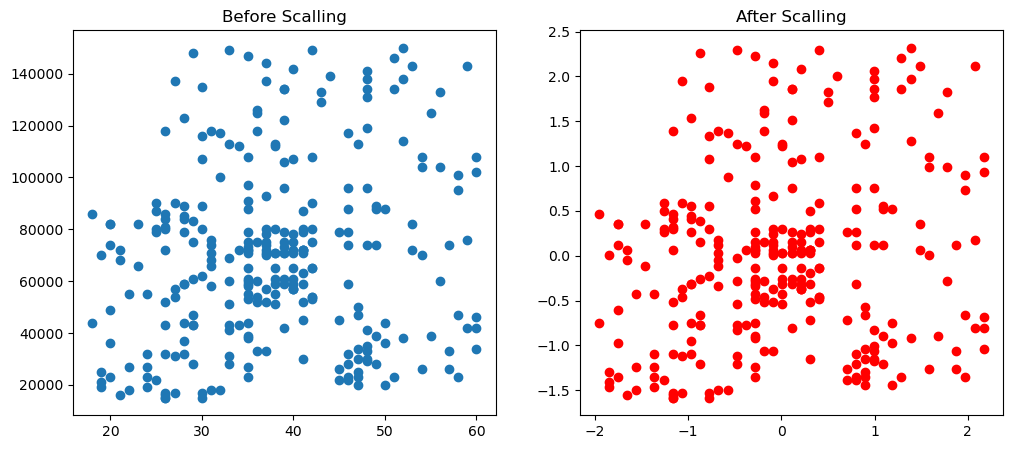

In [33]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x='Age', y='EstimatedSalary', data=x_train)
ax1.set_title("Before Scalling")
ax2.scatter(x='Age', y='EstimatedSalary', data=x_train_scaled, color='red')
ax2.set_title("After Scalling")
plt.show()

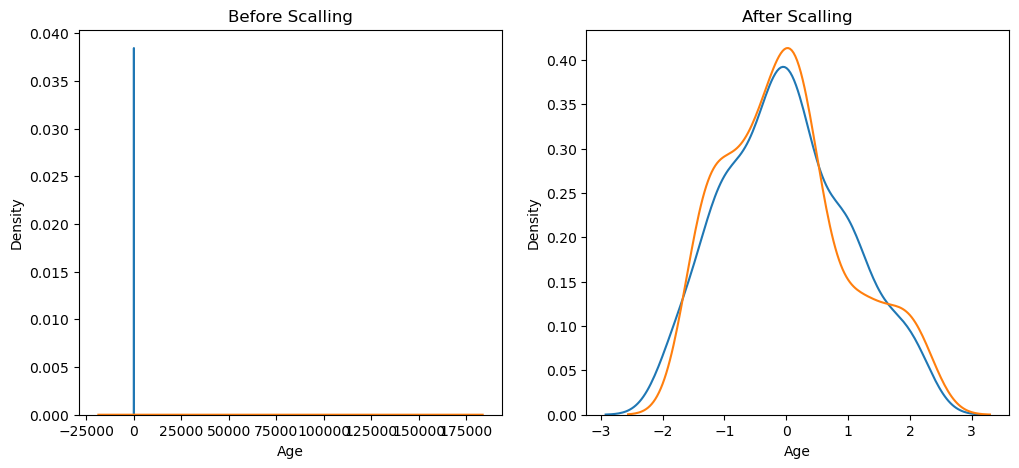

In [39]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scalling")
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title("After Scalling")
ax1.set_title("Before Scalling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

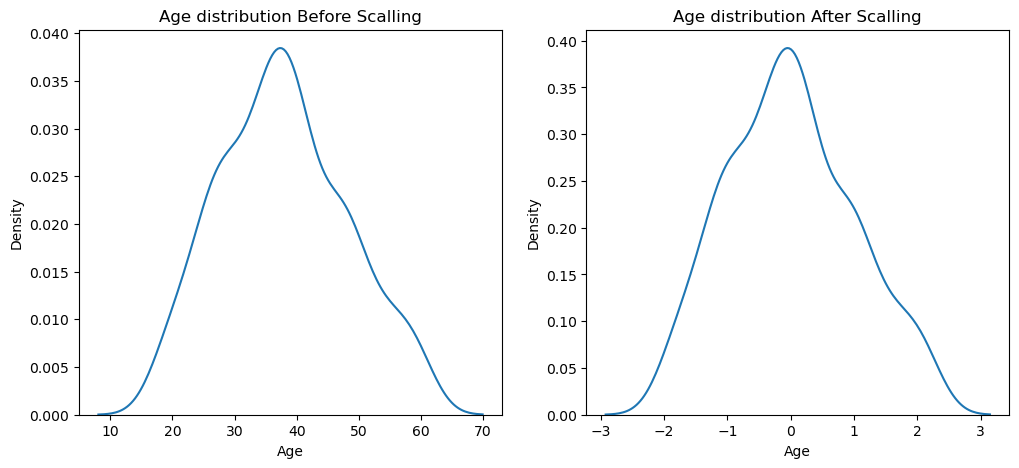

In [40]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Age distribution Before Scalling")
sns.kdeplot(x_train['Age'], ax=ax1)

ax2.set_title("Age distribution After Scalling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

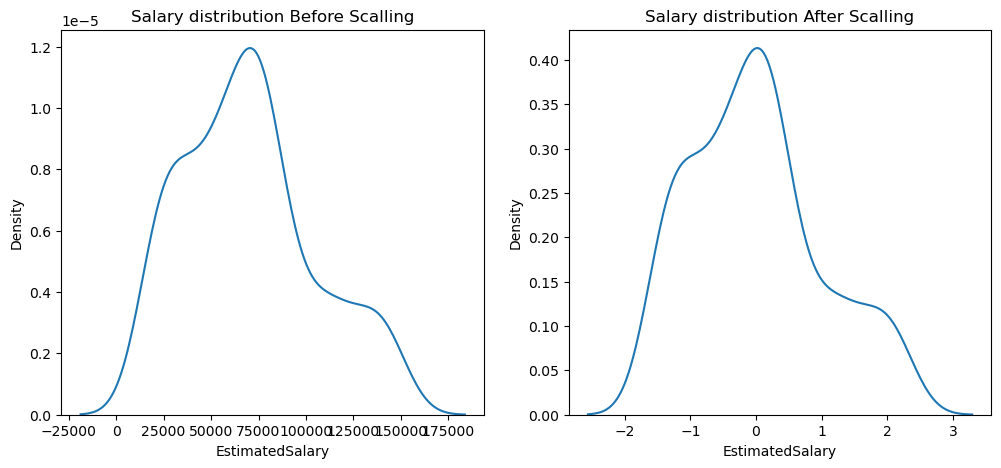

In [41]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Salary distribution Before Scalling")
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title("Salary distribution After Scalling")
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scalling is important?

In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [54]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [55]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [56]:
from sklearn.metrics import accuracy_score
print("Actual", accuracy_score(y_test, y_pred))
print("Sacled", accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Sacled 0.8666666666666667


In [57]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt= DecisionTreeClassifier()
dt_scaled= DecisionTreeClassifier()

In [63]:
dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [64]:
y_pred=dt.predict(x_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)

In [65]:
print("Actual", accuracy_score(y_test, y_pred))
print("Sacled", accuracy_score(y_test, y_pred_scaled))

Actual 0.8666666666666667
Sacled 0.875


In [66]:
df.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

# Effect of outlier

In [87]:
df1= df.append(pd.DataFrame({'Age':[5, 90, 65], 'EstimatedSalary':[1000, 2500000, 4000000], 'Purchased':[0,1,0]}), ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18196\934684109.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df.append(pd.DataFrame({'Age':[5, 90, 65], 'EstimatedSalary':[1000, 2500000, 4000000], 'Purchased':[0,1,0]}), ignore_index=True)


In [88]:
df1

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
398   36            33000          0
399   49            36000          1
400    5             1000          0
401   90          2500000          1
402   65          4000000          0

[403 rows x 3 columns]

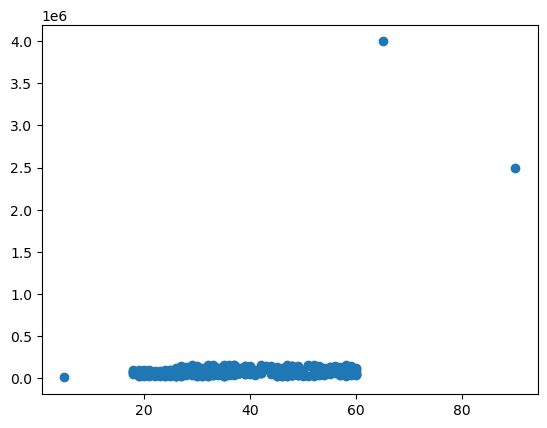

In [89]:
plt.scatter(x='Age', y='EstimatedSalary', data=df1)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df1.drop('Purchased', axis=1),
                                                  df1['Purchased'],
                                                  test_size=0.3,
                                                  random_state=0)
x_train.shape, x_test.shape

((282, 2), (121, 2))

In [92]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)   #mean , S.D is saved

#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [93]:
scaler.mean_

array([3.81489362e+01, 7.71170213e+04])

In [94]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [100]:
np.round(x_train.describe(),1)

Age  EstimatedSalary
count  282.0            282.0
mean    38.1          77117.0
std     11.0         148656.2
min      5.0           1000.0
25%     30.0          43000.0
50%     37.0          68000.0
75%     46.0          86750.0
max     90.0        2500000.0

In [102]:
np.round(x_train_scaled.describe(),1)


Age  EstimatedSalary
count  282.0            282.0
mean     0.0              0.0
std      1.0              1.0
min     -3.0             -0.5
25%     -0.7             -0.2
50%     -0.1             -0.1
75%      0.7              0.1
max      4.7             16.3

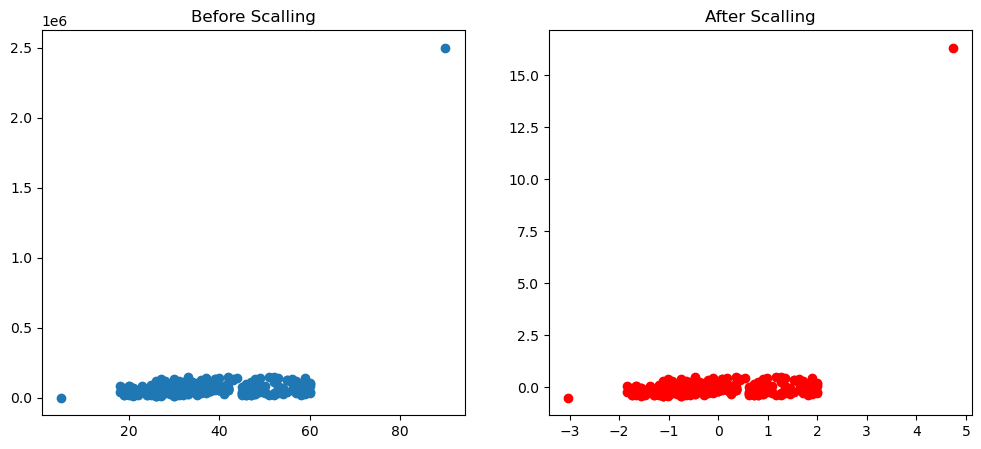

In [103]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x='Age', y='EstimatedSalary', data=x_train)
ax1.set_title("Before Scalling")
ax2.scatter(x='Age', y='EstimatedSalary', data=x_train_scaled, color='red')
ax2.set_title("After Scalling")
plt.show()

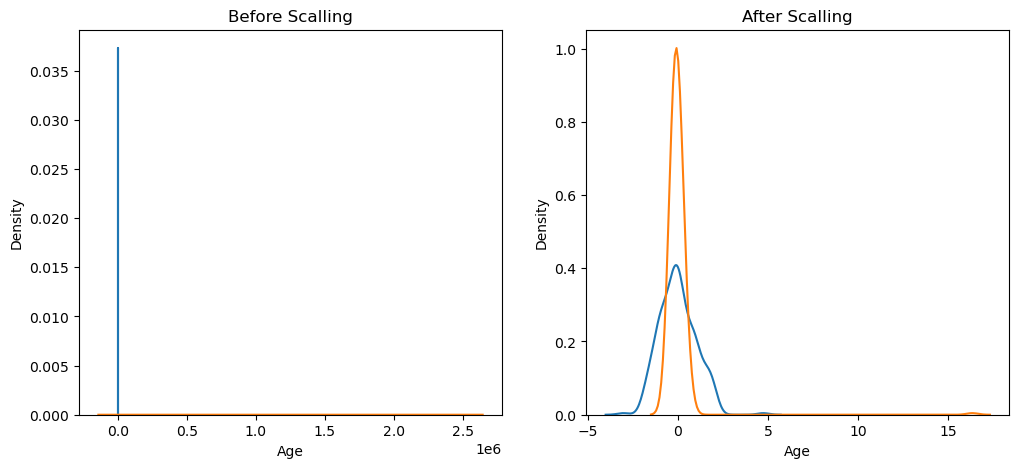

In [104]:
ig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scalling")
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title("After Scalling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

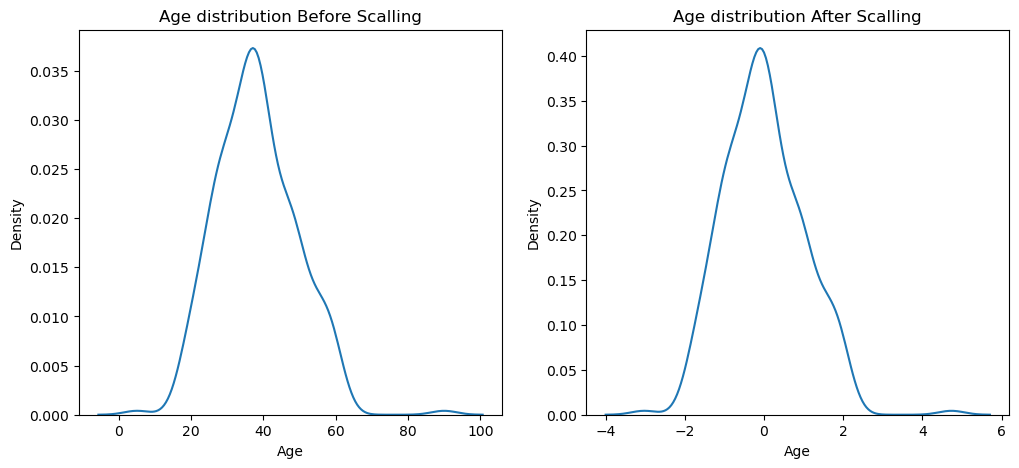

In [105]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Age distribution Before Scalling")
sns.kdeplot(x_train['Age'], ax=ax1)

ax2.set_title("Age distribution After Scalling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

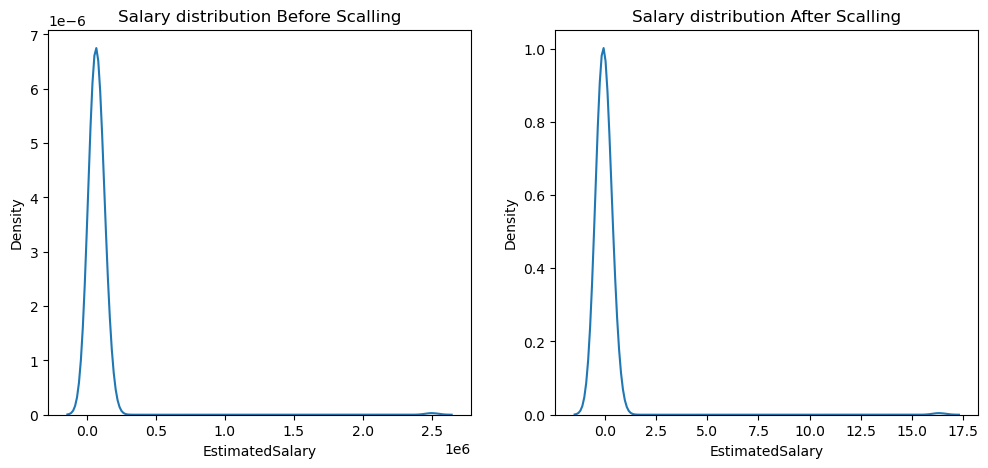

In [106]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Salary distribution Before Scalling")
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title("Salary distribution After Scalling")
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [107]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [108]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [109]:
from sklearn.metrics import accuracy_score
print("Actual", accuracy_score(y_test, y_pred))
print("Sacled", accuracy_score(y_test, y_pred_scaled))

Actual 0.6446280991735537
Sacled 0.8099173553719008
